In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

In [2]:
dataset = pd.read_csv("/Users/mejbah/Documents/Data_Science/avocado.csv")
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
dataset  = dataset.sort_values('Date')

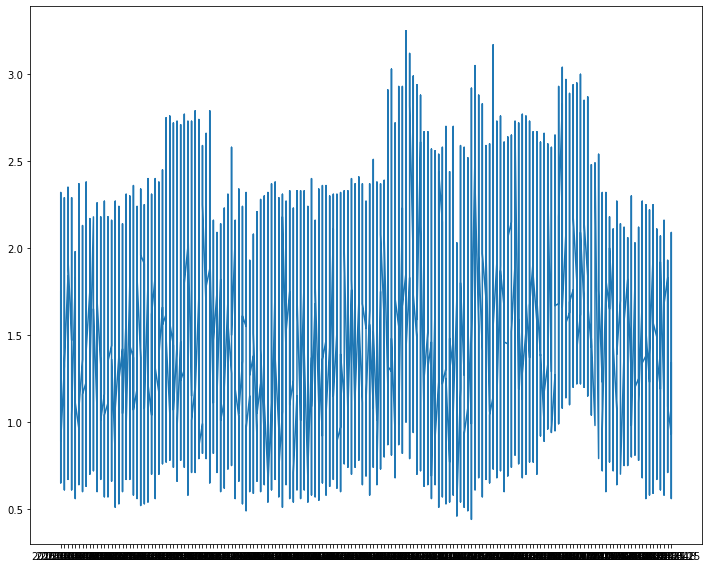

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(dataset['Date'], dataset['AveragePrice'])
plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

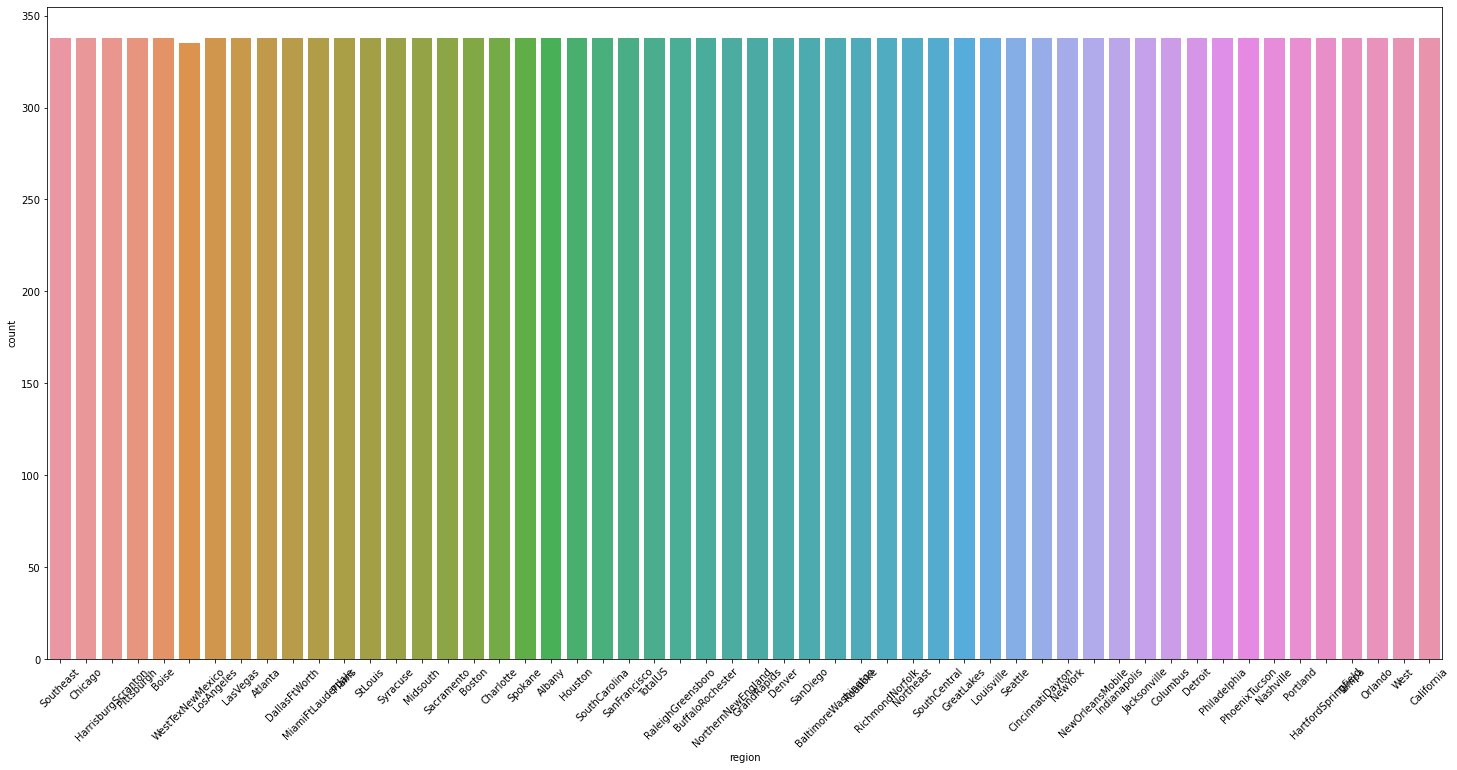

In [6]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'region', data = dataset)
plt.xticks(rotation = 45)

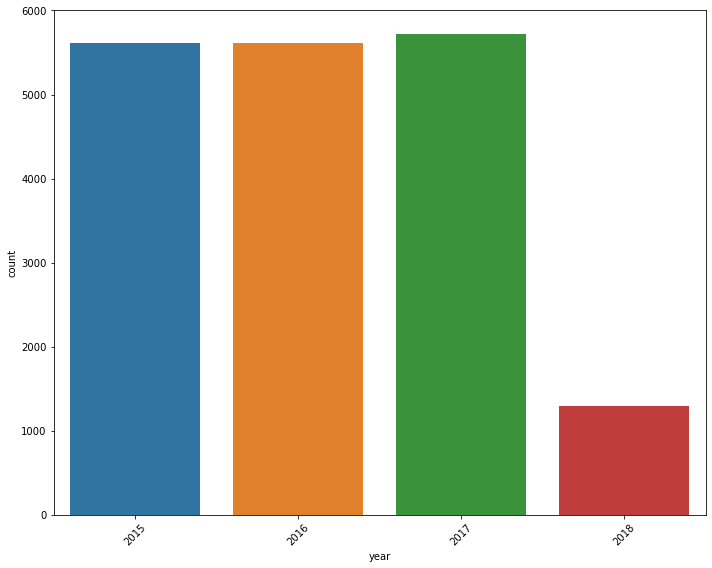

In [7]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'year', data = dataset)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [8]:
dataset_prophet = dataset[['Date', 'AveragePrice']]

In [9]:
dataset_prophet.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [10]:
dataset_prophet = dataset_prophet.rename(columns={'Date': 'ds', 'AveragePrice':'y'})

In [11]:
dataset_prophet.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [12]:
model = Prophet()
model.fit(dataset_prophet)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = model.make_future_dataframe(periods=365)
forcast = model.predict(future)

In [14]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497106,0.903077,1.865692,1.497106,1.497106,-0.113156,-0.113156,-0.113156,-0.113156,-0.113156,-0.113156,0.0,0.0,0.0,1.383950
1,2015-01-11,1.492026,0.896248,1.875847,1.492026,1.492026,-0.104632,-0.104632,-0.104632,-0.104632,-0.104632,-0.104632,0.0,0.0,0.0,1.387394
2,2015-01-18,1.486947,0.891421,1.854928,1.486947,1.486947,-0.104303,-0.104303,-0.104303,-0.104303,-0.104303,-0.104303,0.0,0.0,0.0,1.382644
3,2015-01-25,1.481868,0.860952,1.830233,1.481868,1.481868,-0.123309,-0.123309,-0.123309,-0.123309,-0.123309,-0.123309,0.0,0.0,0.0,1.358559
4,2015-02-01,1.476788,0.866784,1.794249,1.476788,1.476788,-0.151727,-0.151727,-0.151727,-0.151727,-0.151727,-0.151727,0.0,0.0,0.0,1.325062


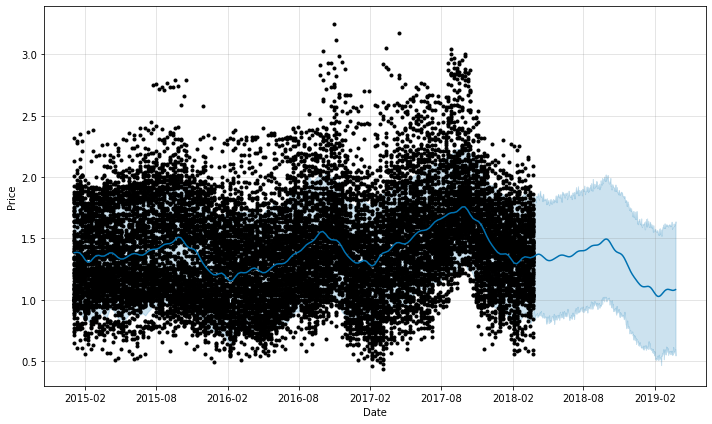

In [15]:
figure = model.plot(forcast, xlabel = 'Date', ylabel='Price')

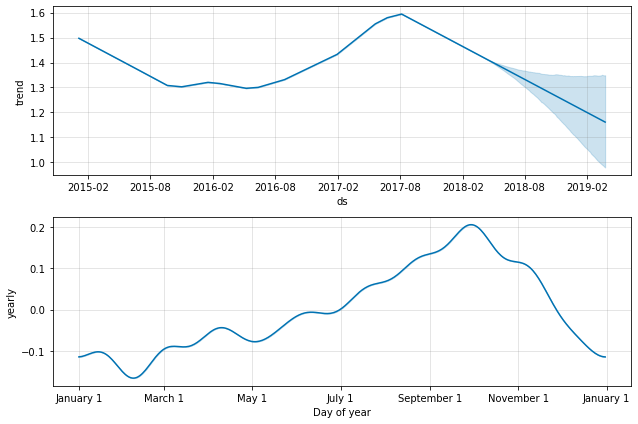

In [16]:
figure3 = model.plot_components(forcast)

In [17]:
dataset_sample = dataset[dataset['region'] == 'West']

In [18]:
dataset_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


In [19]:
dataset_sample = dataset_sample.sort_values('Date')

In [20]:
dataset_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


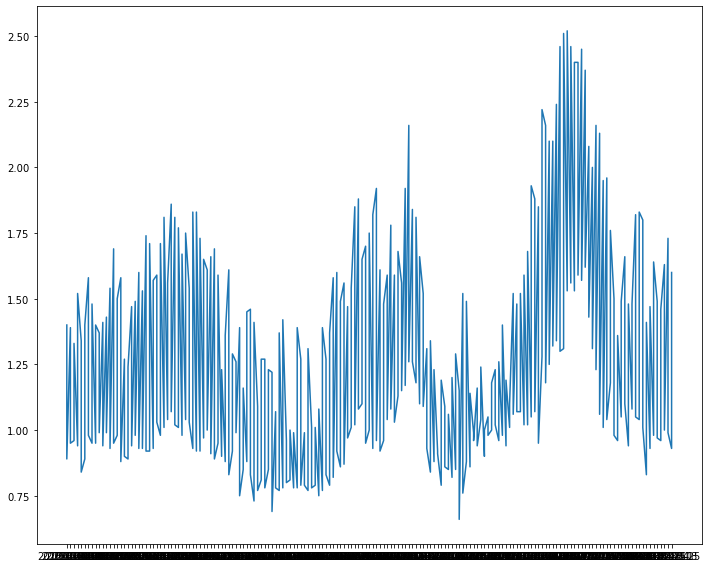

In [21]:
plt.figure(figsize = (10, 8))
plt.plot(dataset_sample['Date'], dataset_sample['AveragePrice'])
plt.tight_layout()
plt.show()

In [22]:
dataset_sample = dataset_sample.rename(columns={'Date':'ds', 'AveragePrice': 'y'})

In [23]:
model = Prophet()
model.fit(dataset_sample)
future = model.make_future_dataframe(periods = 365)
forcast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


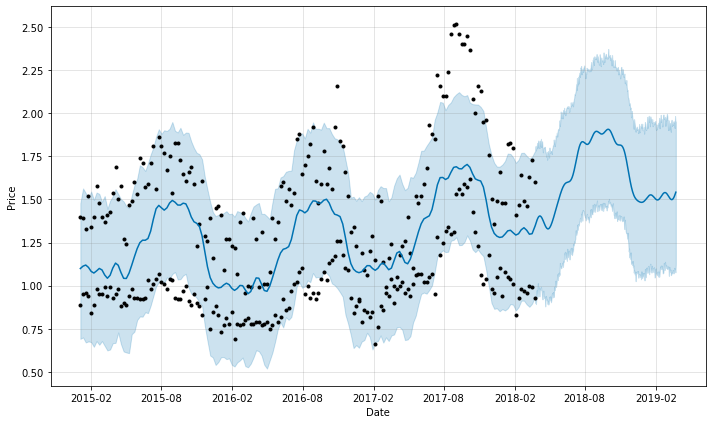

In [24]:
figure = model.plot(forcast, xlabel='Date', ylabel='Price')

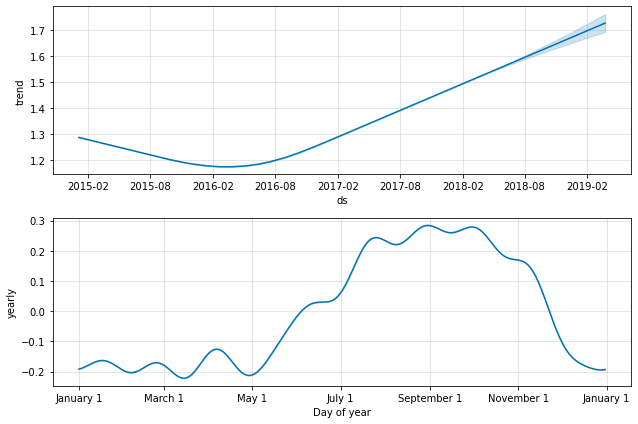

In [25]:
figure3 = model.plot_components(forcast)